<a href="https://colab.research.google.com/github/cassiomatheus/Intelig-ncia-Computacional/blob/main/Trabalho_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **PARTE 1 Do** **Trabalho** 

# Passo 1: Instalação de Requisitos

In [ ]:
#clone YOLOv5 and 
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5
%pip install -qr requirements.txt # install dependencies
%pip install -q roboflow

import torch
import os
from IPython.display import Image, clear_output  # to display images

print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Cloning into 'yolov5'...
remote: Enumerating objects: 14525, done.
remote: Counting objects: 100% (48/48), done.
remote: Compressing objects: 100% (34/34), done.
remote: Total 14525 (delta 23), reused 24 (delta 14), pack-reused 14477
Receiving objects: 100% (14525/14525), 13.69 MiB | 32.83 MiB/s, done.
Resolving deltas: 100% (10004/10004), done.
/content/yolov5
     |████████████████████████████████| 182 kB 31.4 MB/s 
     |████████████████████████████████| 62 kB 1.6 MB/s 
     |████████████████████████████████| 1.6 MB 42.9 MB/s 
     |████████████████████████████████| 42 kB 957 kB/s 
     |████████████████████████████████| 67 kB 7.0 MB/s 
     |████████████████████████████████| 145 kB 80.1 MB/s 
     |████████████████████████████████| 54 kB 3.6 MB/s 
     |████████████████████████████████| 178 kB 73.9 MB/s 
     |████████████████████████████████| 138 kB 76.9 MB/s 
     |████████████████████████████████| 62 kB 1.8 MB/s 
Setup complete. Using torch 1.13.0+cu116 (Tesla T4)


# Passo 2: Montando o conjunto de dados


In [ ]:
from roboflow import Roboflow
rf = Roboflow(model_format="yolov5", notebook="ultralytics")

upload and label your dataset, and get an API KEY here: https://app.roboflow.com/?model=yolov5&ref=ultralytics


In [ ]:
# set up environment
os.environ["DATASET_DIRECTORY"] = "/content/datasets"

In [ ]:
!pip install roboflow
from roboflow import Roboflow
rf = Roboflow(api_key="kz3qyQ4jGege3lLvQK0j")
project = rf.workspace("home-qtnel").project("placas-de-carro-cloac")
dataset = project.version(1).download("yolov5")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to /content/datasets/Placas-de-Carro-1 in yolov5pytorch:: 100%|██████████| 290/290 [00:00<00:00, 1339.97it/s]


# Passo 3: Treinando o modelo YOLOv5 personalizado

In [ ]:
!python train.py --img 416 --batch 16 --epochs 150 --data {dataset.location}/data.yaml --weights yolov5m.pt --cache

train: weights=yolov5m.pt, cfg=, data=/content/datasets/Placas-de-Carro-1/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=150, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-34-g1ae9194 Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hs

# Avaliando o desempenho do detector YOLOv5 personalizado

In [ ]:
# Start tensorboard
# Launch after you have started training
# logs save in the folder "runs"
%load_ext tensorboard
%tensorboard --logdir runs

#Executar inferência com pesos treinados
Execute a inferência com um ponto de verificação pré-treinado no conteúdo da pasta `test/images` baixada do Roboflow.

In [ ]:
!python detect.py --weights runs/train/exp/weights/best.pt --img 416 --conf 0.1 --source {dataset.location}/test/images

detect: weights=['runs/train/exp/weights/best.pt'], source=/content/datasets/Placas-de-Carro-1/test/images, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-34-g1ae9194 Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 212 layers, 20852934 parameters, 0 gradients, 47.9 GFLOPs
image 1/7 /content/datasets/Placas-de-Carro-1/test/images/14805800840_967891808a_z_jpg.rf.f525624adb1e681582e301998f44551f.jpg: 416x416 1 placas-de-carro, 18.3ms
image 2/7 /content/datasets/Placas-de-Carro-1/test/images/15729714504_5a63a34680_o_jpg.rf.aa1f510ec3ce0575f5869deea3e6a1b4.jpg: 416x416 2 placas-de-carros, 1

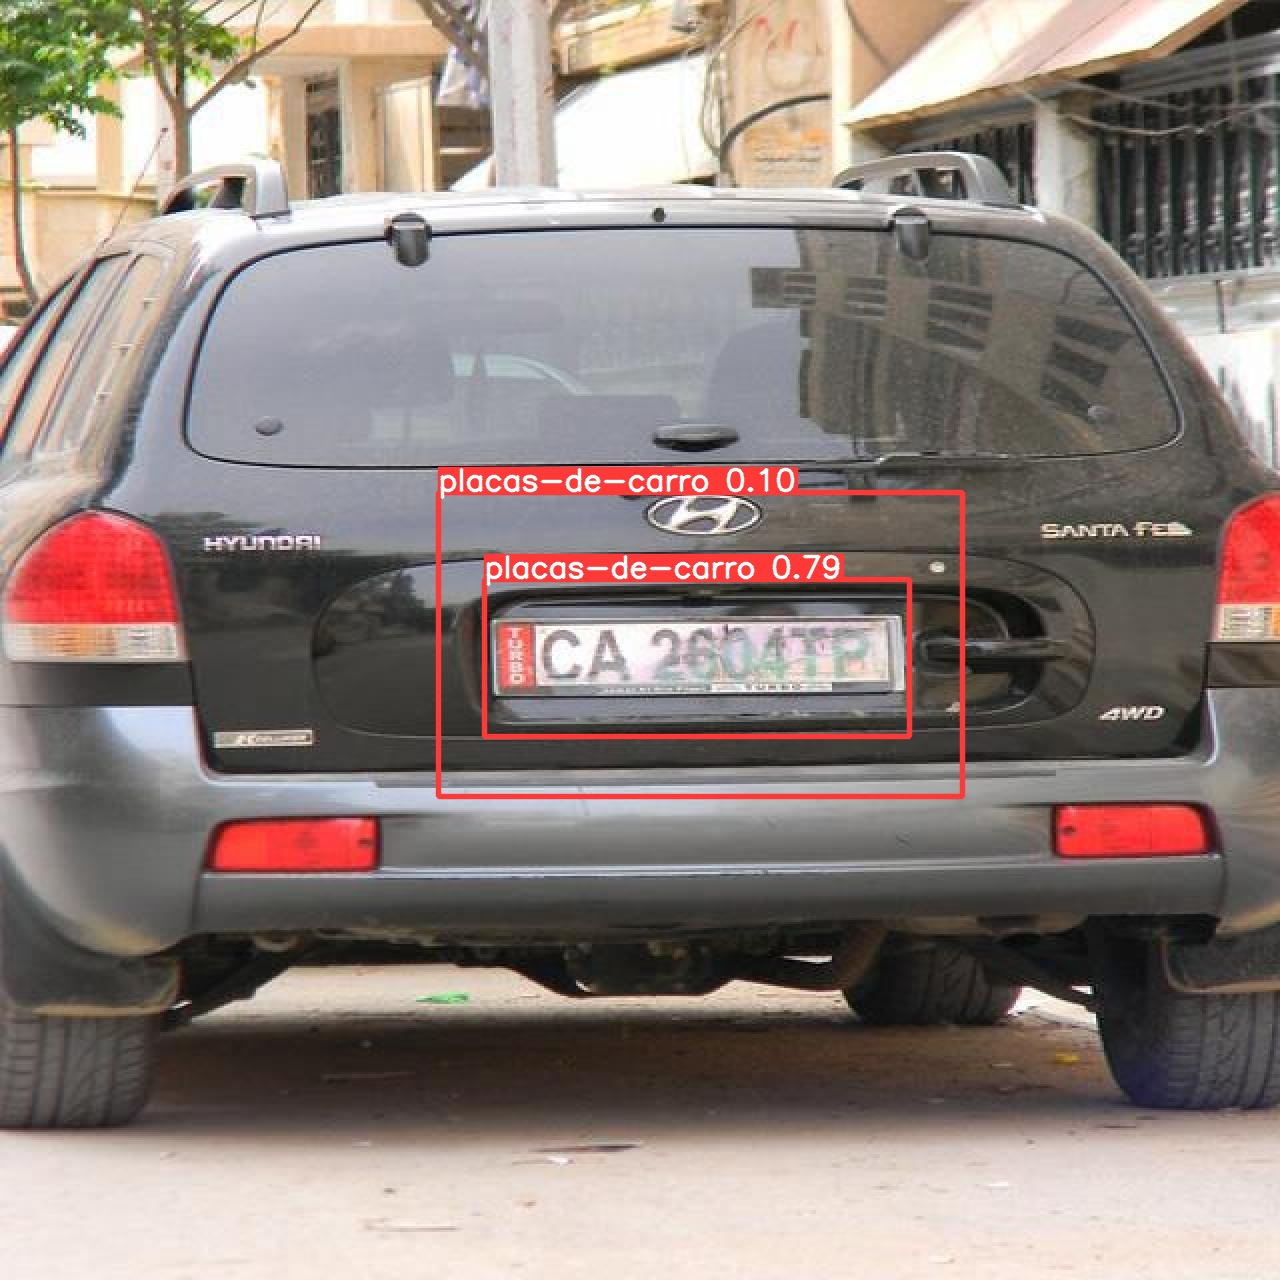

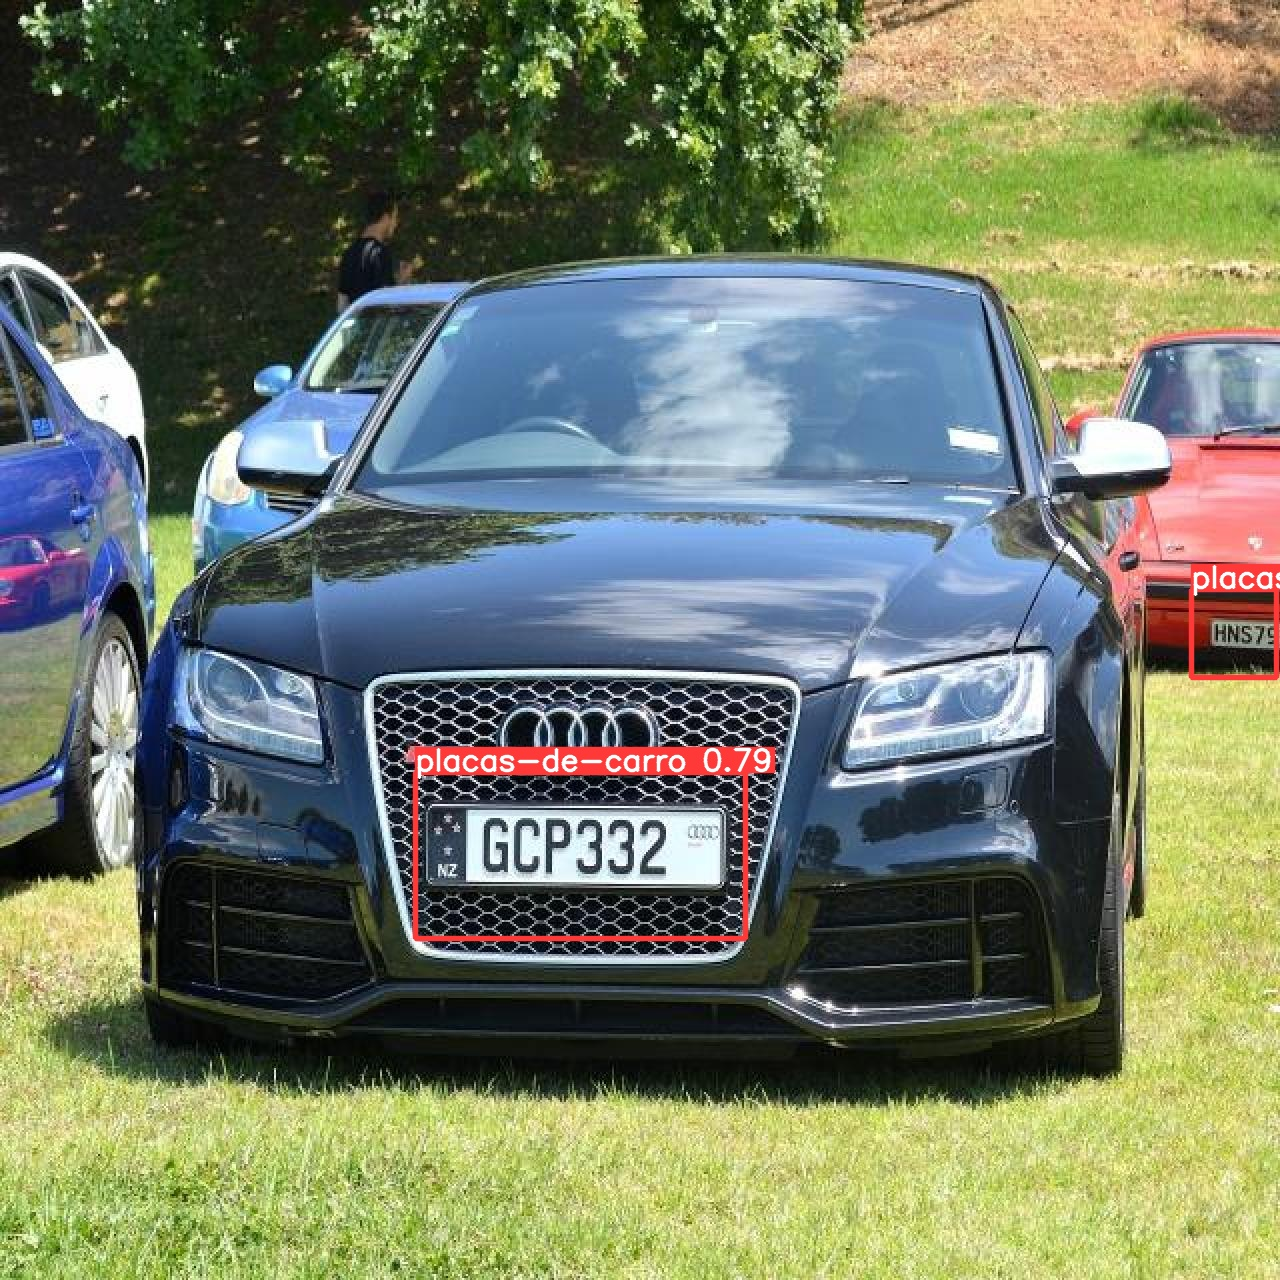

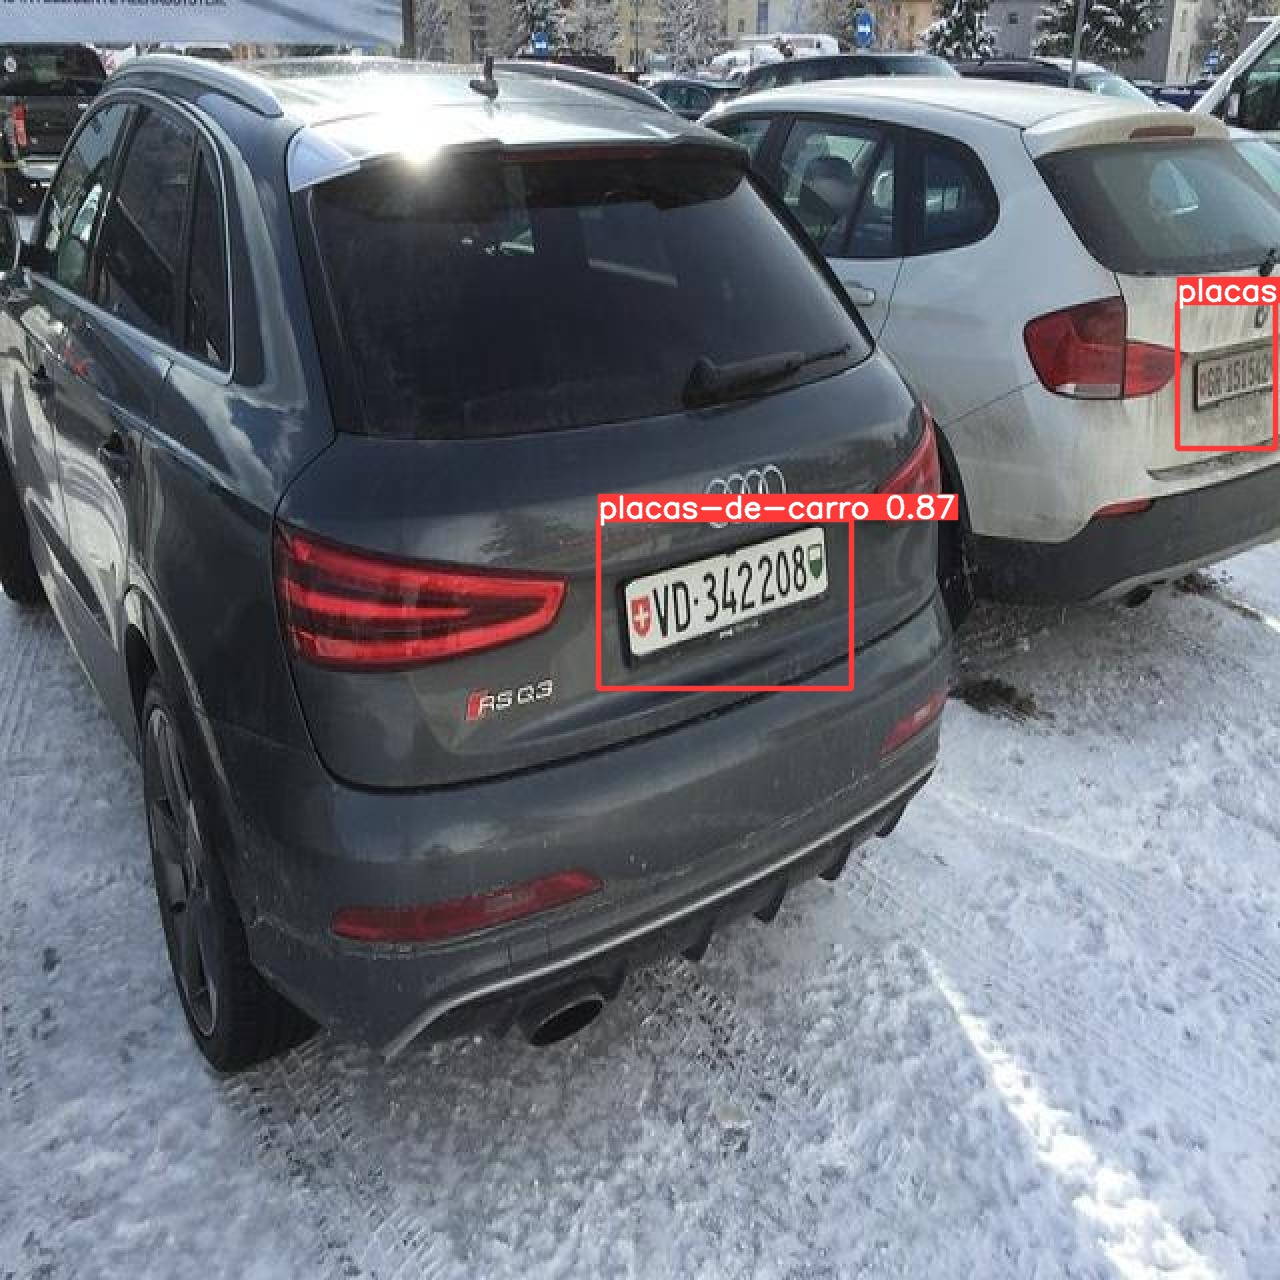

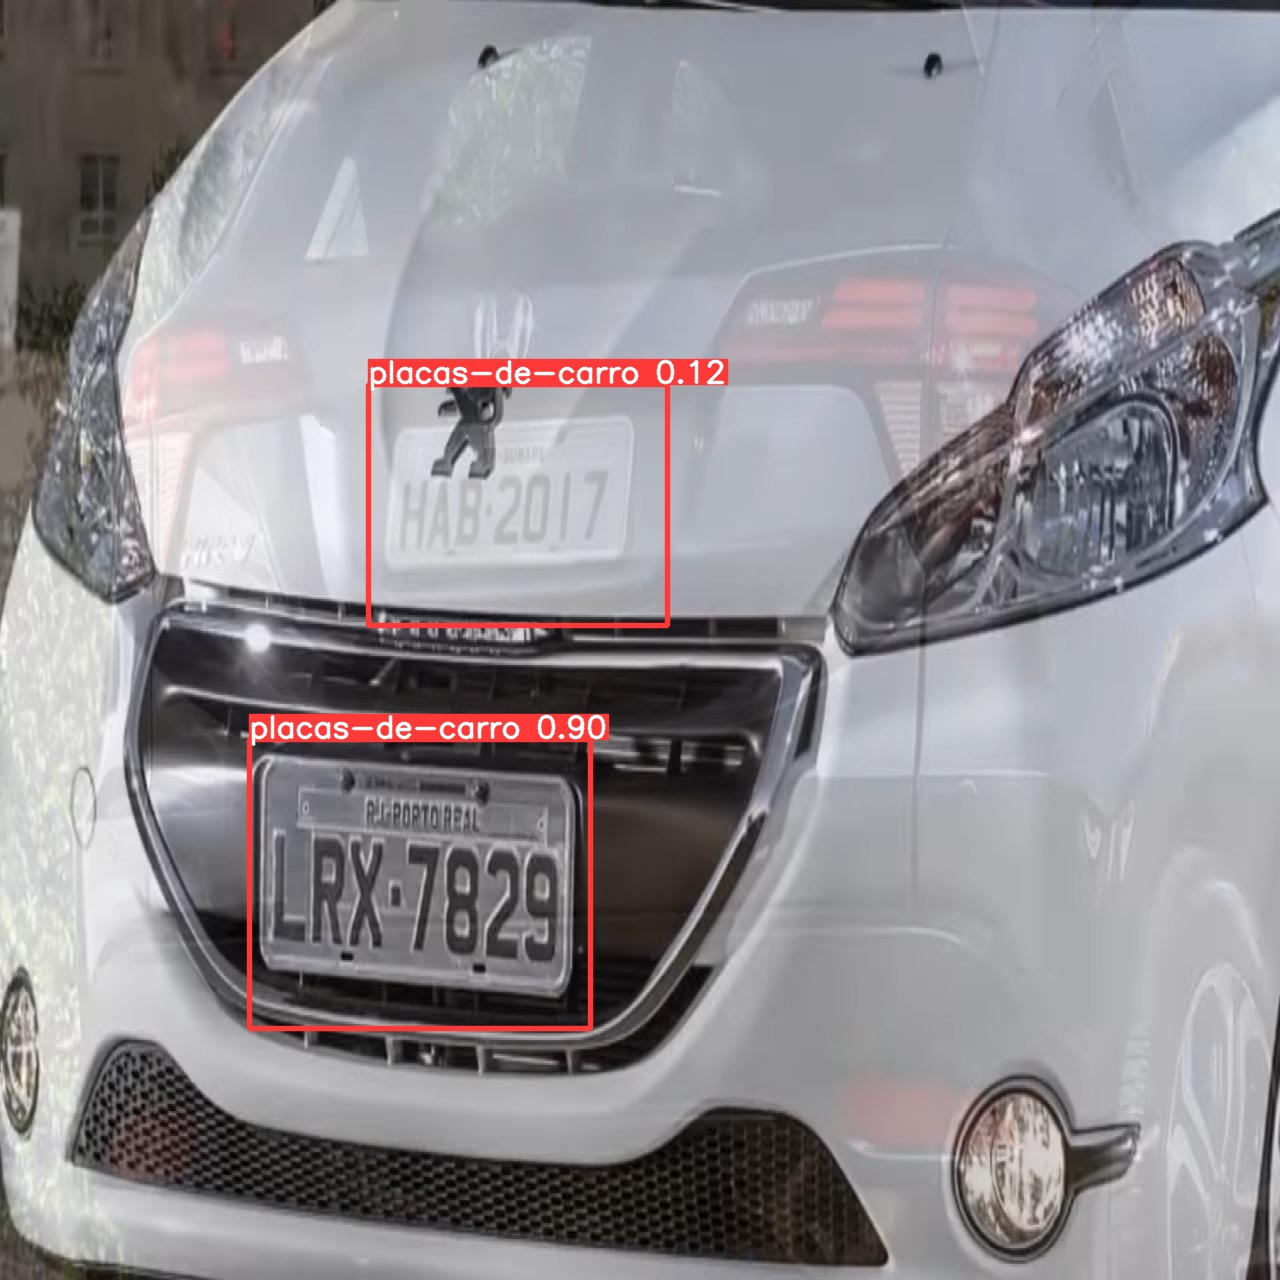

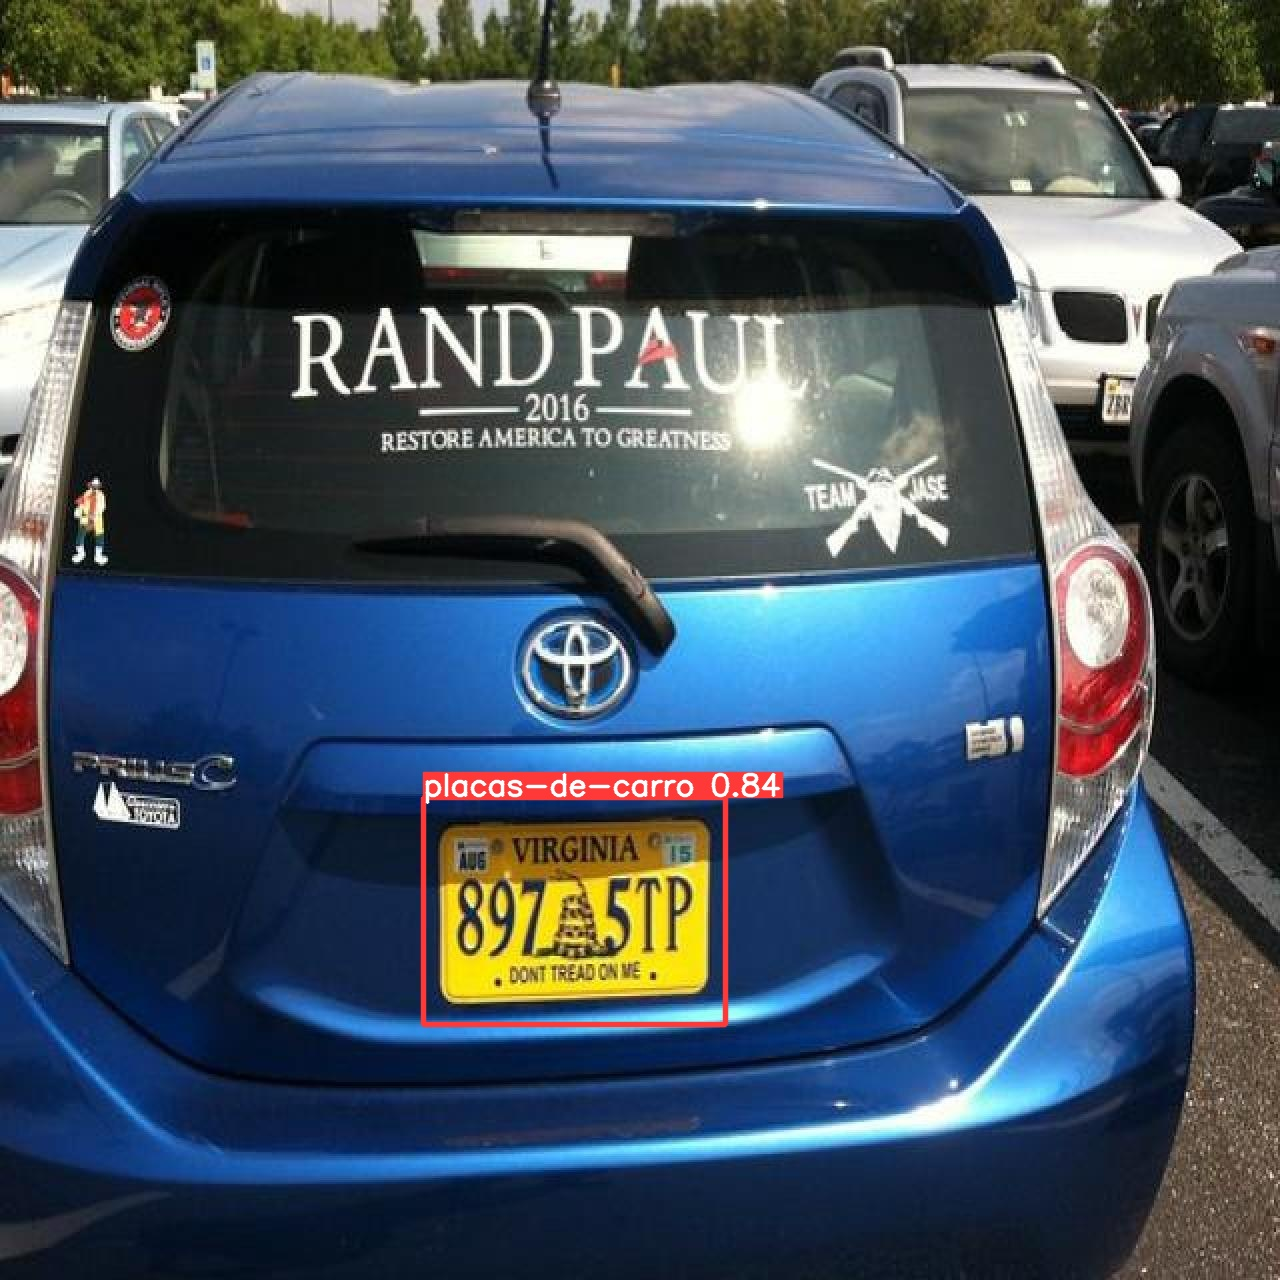

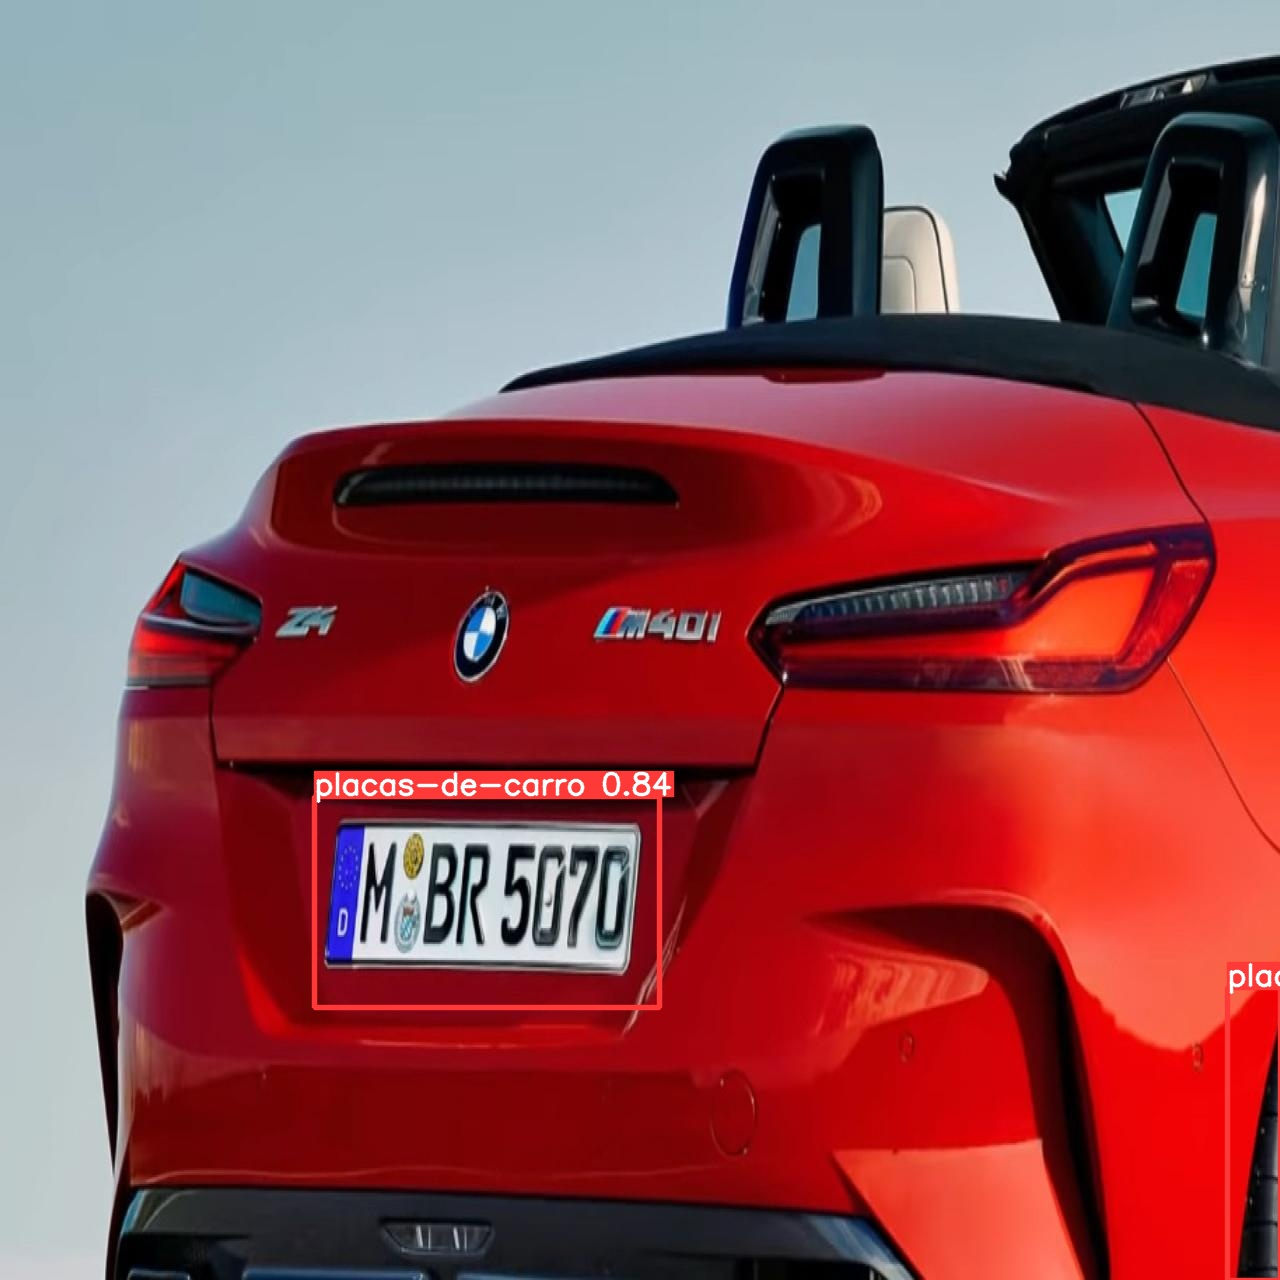

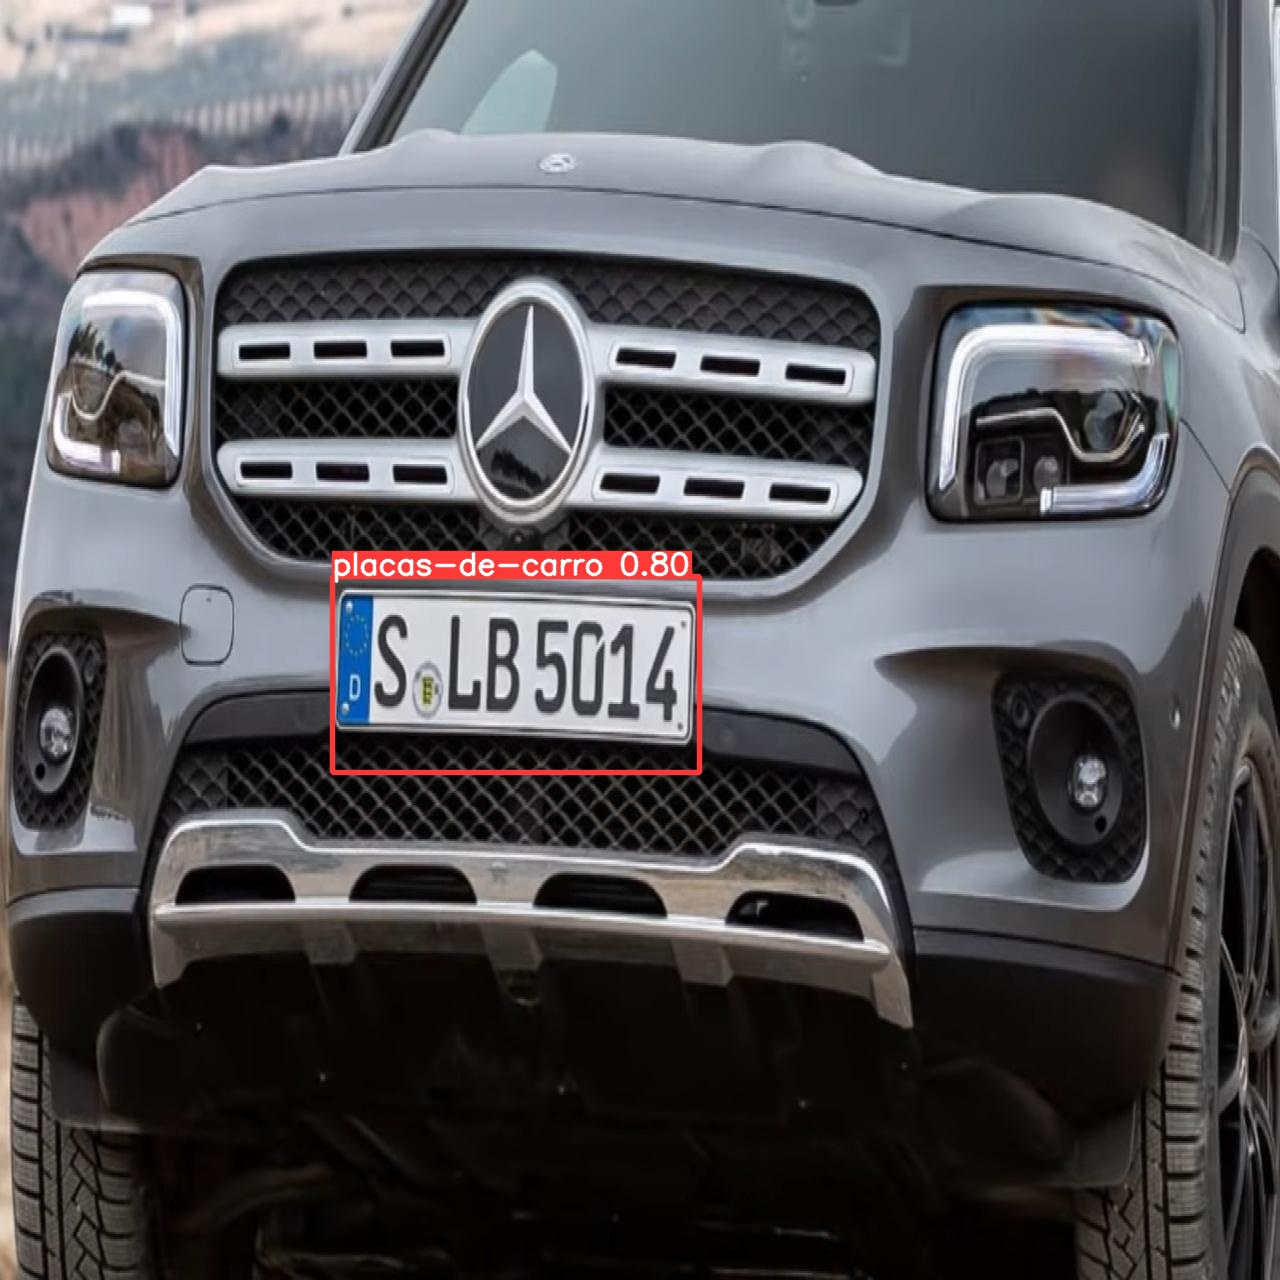

In [ ]:
#display inference on ALL test images

import glob
from IPython.display import Image, display

for imageName in glob.glob('/content/yolov5/runs/detect/exp/*.jpg'): #assuming JPG
    display(Image(filename=imageName))
    print("\n")

## Link para o video e saida da Rede YOLO visto na apresentação:

https://drive.google.com/folderview?id=1dIaDgHCRzwV2N2GZseFo06NXCXE6rsMu